# D207 - Exploratory Data Analysis
***Desiree McElroy***


The dataset I chose is the medical dataset.

## A1. Research Question

The research question focuses on whether there's a variation in readmission rates between genders. This is important because it helps pinpoint which factors readmission rates are dependent on. The null hypothesis would be that gender and readmissions are independent of each other. This initial step is crucial in guiding further investigation into potential correlations between other patient demographics and hospital readmissions.

## A2. Why is this beneficial for stakeholders?

Regarding the benefits for stakeholders, it helps in identifying potential gender-based disparities in healthcare outcomes. If there is an association between gender and readmission, it could signal underlying issues such as differences in healthcare access and quality of care among genders. Addressing these disparities is essential for ensuring equitable healthcare delivery. Secondly, this analysis can fuel targeted interventions and personalized care approaches. By understanding how gender influences readmission risk, hospitals can tailor interventions and support services to specific patient groups more effectively, ultimately improving patient outcomes and reducing healthcare costs. Additionally, these insights enable hospitals to allocate resources efficiently, directing attention and resources towards areas with the greatest need based on gender-specific readmission patterns. Overall, examining the independence of gender from hospital readmission is critical for promoting fairness, improving healthcare quality, and optimizing resource allocation within healthcare systems.

## A3. Identify relevant data to research question.


The features needed for this analysis are the gender and readmission variable (column). The ReAdmis (later renamed to readmission) column is a binary variable which indicates Yes or No for readmission. The gender column is categorical and has three categories; female, male and nonbinary.

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# read in data
df = pd.read_csv('medical_clean.csv')
df.head(3)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.40342,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.99812,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.19246,2,4,4,4,3,4,3,3


**The following code is used from my previous performance assessment D206 for data cleaning and pre-processing**

In [3]:
# run through clean
# lowercase columns
df.columns = map(str.lower, df.columns)
    
# change timezone column entries before changing data type
tz_dict = {
    "America/Puerto_Rico" : "US - Puerto Rico",
    "America/New_York": "US - Eastern",
    "America/Detroit" : "US - Eastern",
    "America/Indiana/Indianapolis" : "US - Eastern",
    "America/Indiana/Vevay" : "US - Eastern",
    "America/Indiana/Vincennes" : "US - Eastern",
    "America/Kentucky/Louisville" : "US - Eastern",
    "America/Toronto" : "US - Eastern",
    "America/Indiana/Marengo" : "US - Eastern",
    "America/Indiana/Winamac" : "US - Eastern",
    "America/Chicago" : "US - Central", 
    "America/Menominee" : "US - Central",
    "America/Indiana/Knox" : "US - Central",
    "America/Indiana/Tell_City" : "US - Central",
    "America/North_Dakota/Beulah" : "US - Central",
    "America/North_Dakota/New_Salem" : "US - Central",
    "America/Denver" : "US - Mountain",
    "America/Boise" : "US - Mountain",
    "America/Phoenix" : "US - Arizona",
    "America/Los_Angeles" : "US - Pacific",
    "America/Nome" : "US - Alaskan",
    "America/Anchorage" : "US - Alaskan",
    "America/Sitka" : "US - Alaskan",
    "America/Yakutat" : "US - Alaskan",
    "America/Adak" : "US - Aleutian",
    "Pacific/Honolulu" : 'US - Hawaiian'
    }
df.timezone.replace(tz_dict, inplace=True)

# convert zip column to str, then fill 0s in entries
df.zip = df.zip.astype('str').str.zfill(5)

# changing datatypes
# change columns to boolean data type
to_bool = ['readmis', 'soft_drink', 'highblood', 'stroke',
           'complication_risk', 'overweight', 'arthritis', 'diabetes',
          'hyperlipidemia', 'backpain', 'anxiety', 'allergic_rhinitis',
          'reflux_esophagitis', 'asthma']
# make a copy to remove entries with 1,0 and change str entries to int
to_bool_copy = to_bool.copy()
to_bool_copy.remove('anxiety')
to_bool_copy.remove('overweight')
for col in to_bool_copy:
    df[col] = df[col].replace({'Yes':1, 'No':0}).astype(bool)

for col in to_bool:
    df[col] = df[col].astype('bool')

# round entries in columns to only have two decimal places
round_num = ['vitd_levels', 'totalcharge', 'additional_charges']
for col in round_num:
    df[col] = round(df[col], 2)

# change columns to integer data type
to_int = ['population', 'children', 'age','income',
         'initial_days']
for col in to_int:
    df[col] = df[col].astype('int32')

# change columns to categorical data type
to_cat = ['marital', 'gender', 'initial_admin', 'services',
          'item1', 'item2', 'item3', 'item4', 'item5', 
          'item6', 'item7', 'item8', 'timezone', 'state',
          'complication_risk']
for col in to_cat:
    df[col] = df[col].astype('category')
    
    
    
# make columns more readable  
columns = ['case_order', 'customer_id', 'interaction', 'unique_id', 'city', 
           'state', 'county', 'zip', 'latitude', 'longitude', 'population', 'area', 
           'timezone', 'job', 'children', 'age', 
           'income', 'marital', 'gender', 'readmission', 'vitd_levels', 'doc_visits', 
           'full_meals_eaten', 'vitd_supplement', 'soft_drink', 'initial_admin', 
           'high_blood', 'stroke', 'complication_risk', 'overweight', 'arthritis', 
           'diabetes', 'hyperlipidemia', 'backpain', 'anxiety', 'allergic_rhinitis',
           'reflux_esophagitis', 'asthma', 'services_received', 'initial_days', 'total_charge', 
           'additional_charges', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6', 
           'item7', 'item8']

df.columns = columns
df.set_index('case_order', inplace=True)

## B1. Describe data analysis; $Chi^2$ Test

${H_0}$: There is no association between Gender and Readmission and thus are independent.


${H_a}$: There is an association between Gender and Readmission and thus not independent.

In [4]:
# use pd crosstab to create observe table
observed = pd.crosstab(df.gender, df.readmission)
observed

readmission,False,True
gender,,
Female,3205,1813
Male,2995,1773
Nonbinary,131,83


## B2. Output and Calculations

In [5]:
# choose a chi^2 test to test for independence between gender and readmissions
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [6]:
print('Observed')
print(observed.values)
print('---\nExpected')
print(expected.astype(int))
print('---')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[3205 1813]
 [2995 1773]
 [ 131   83]]
---
Expected
[[3176 1841]
 [3018 1749]
 [ 135   78]]
---
chi^2 = 1.5858
p     = 0.4525


In [7]:
# set alpha for significance level
alpha = 0.05
if p < alpha:
    print('We reject the null hypothesis')
else:
    print("We FAIL to reject the null hypothesis")

We FAIL to reject the null hypothesis


## B3. Justify why I chose this analysis technique.

This $chi^2$ test was chosen as the statisitcal method for analyzing the relationship between gender and readmission due to its suitability for categorical data analysis. In this case, both gender and readmission are categorical variables making the $chi^2$ an appropriate choice for assessing any association between these two variables.

-------
## C. Univariate Stats: Identify the distribution

### Continuous Variables

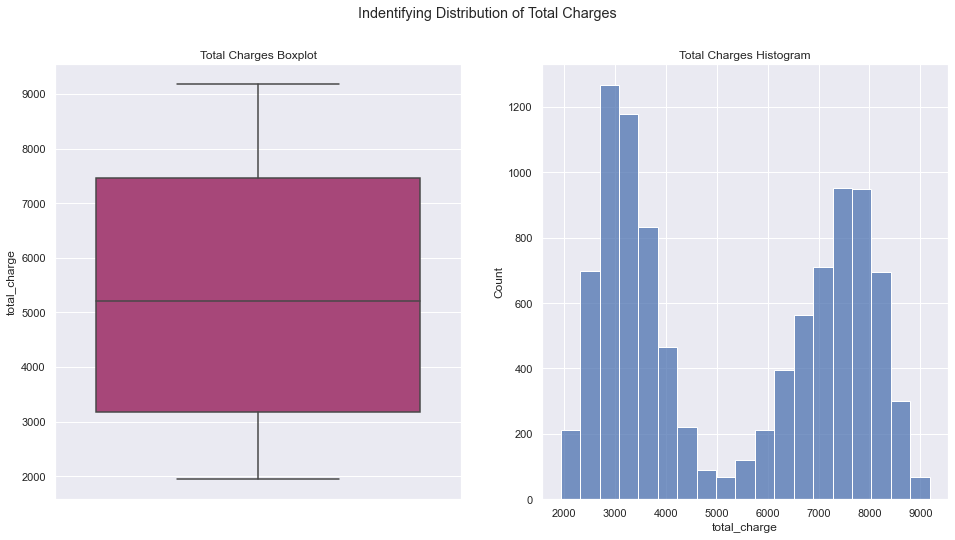

In [8]:
# set dark grid as background for graphs for ease of reading
sns.set_theme(style="darkgrid")
# set size
plt.figure(figsize=(16,8))
plt.suptitle('Indentifying Distribution of Total Charges')

# set up box plot, include outliers (default)
plt.subplot(1,2,1)
plt.title('Total Charges Boxplot')
sns.boxplot(data=df, y='total_charge', palette='magma')

# set up histogram to view distribution
plt.subplot(1,2,2)
plt.title('Total Charges Histogram')
sns.histplot(data=df, x='total_charge')
plt.show()

In [9]:
# get print out of total charges stats
print('Univariate Statistics for Total Charges')
round(df.total_charge.describe(),2)

Univariate Statistics for Total Charges


count    10000.00
mean      5312.17
std       2180.39
min       1938.31
25%       3179.38
50%       5213.95
75%       7459.70
max       9180.73
Name: total_charge, dtype: float64

Initial scope of the total charges column reveals a bi-modal distribution, indicating the presence of two distinct peaks in the data. This observation suggests that there are common charges within the lower half and higher half of the dataset, reflecting potentially different patterns or subgroups within the data. The mean charge is approximately \\$5,312 with charges ranging from \\$1,939 to \\$9,180, highlighting the considerable variability in healthcare costs represented in the dataset. The bi-modal nature of the distribution prompts further investigation into potential factors contributing to this pattern such as differences in healthcare services, patient demographics, or coverages. Understanding the underlying reasons for the dual peaks in charges can provide valuable insights for healthcare providers, policymakers, and patients alike.

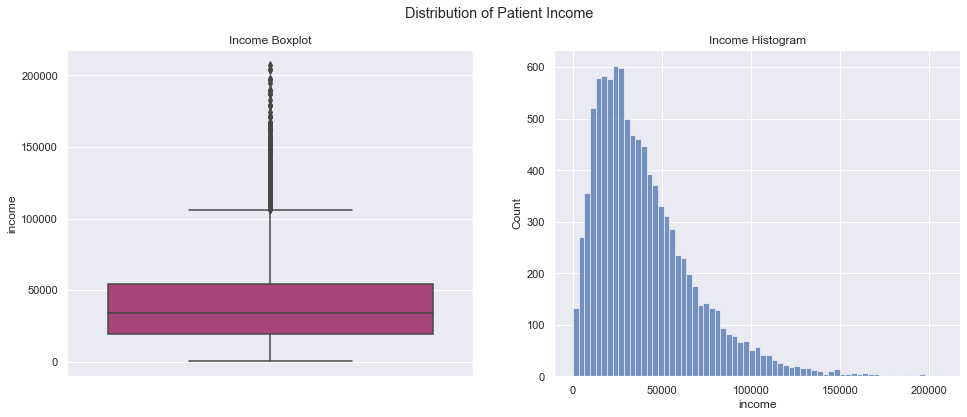

In [10]:
# set size
plt.figure(figsize=(16,6))
plt.suptitle('Distribution of Patient Income')

# analyze boxplot
plt.subplot(1,2,1)
plt.title('Income Boxplot')
sns.boxplot(data=df, y='income', palette='magma')

# view histogram
plt.subplot(1,2,2)
plt.title('Income Histogram')
sns.histplot(data=df, x='income')
plt.show()

In [11]:
# get statistical info on income column
print('Univariate Statistics for Income')
round(df.income.describe(),2)

Univariate Statistics for Income


count     10000.00
mean      40490.00
std       28521.15
min         154.00
25%       19598.25
50%       33768.00
75%       54295.75
max      207249.00
Name: income, dtype: float64

At a first glance the distribution and boxplot of the income column reveal that patients with an income range of approximately \\$25,000 to \\$50,000 are the most highly represented population, suggesting that this income bracket encompasses a significant portion of the patient demographic. The right-skewed distribution implies that while the majority of patients fall within this income range, there are also individuals with higher incomes represented in the dataset. The presence of outliers above the \\$100,000 range suggests the existence of a subset of patients with significantly higher incomes. This is useful because understanding the income distribution of patients can inform healthcare providers and policymakers about the financial circumstances of the population they serve. I think it would be interesting to see if any visual correlation between income and total charges exists. The hope is that it does not.

### Categorical Variables

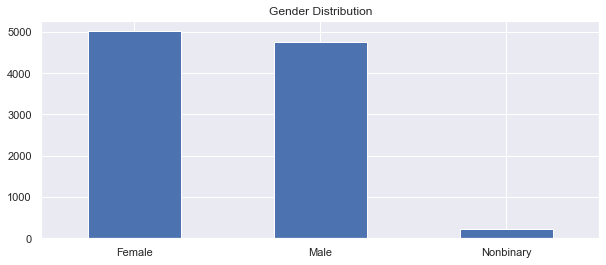

In [12]:
plt.figure(figsize=(10,4))
df.gender.value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xticks(rotation=0)
plt.show()

In [13]:
print(df.gender.describe())
print('-------')
df.gender.value_counts()

count      10000
unique         3
top       Female
freq        5018
Name: gender, dtype: object
-------


Female       5018
Male         4768
Nonbinary     214
Name: gender, dtype: int64

A quick analysis of the gender variations among patients give us an idea of the gender represenations amongst the patients in the dataset. We can see that nonbinary is the least represented while female is most represented. Males are also prominently represented, closely trailing behind females in terms of frequency. With nonbinary being the least represented population, this could suggest an increase in data collection efforts for the under represented gender.

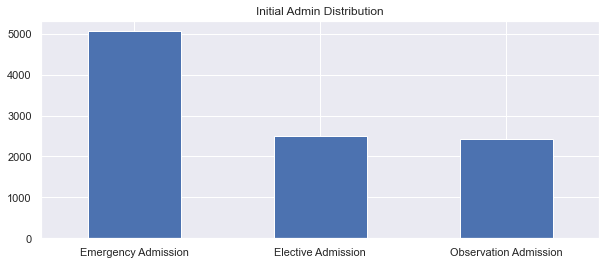

In [14]:
plt.figure(figsize=(10,4))
df.initial_admin.value_counts().plot(kind='bar')
plt.title('Initial Admin Distribution')
plt.xticks(rotation=0)
plt.show()

In [15]:
print(df.initial_admin.describe())
print('----')
df.initial_admin.value_counts()

count                   10000
unique                      3
top       Emergency Admission
freq                     5060
Name: initial_admin, dtype: object
----


Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: initial_admin, dtype: int64

An examination of the initial admission column provides valuable insights into the admission patterns within the data set. The data reveals that over half of the patients were admitted under emergency admission while the remaining patients are divided between elective admission and observation admission. the latter suggests a mix of planned procedures and short-term monitoring cases. This distribution raises the possibility of conducting separate analyses based on initial admission type to better understand readmission patterns. Given the distinct nature of emergency admissions compared to elective or observation admissions, it is reasonable to hypothesize that readmission rates may vary significantly across these categories.

## D. Identify the distribution using bivariate statistics.

### Two continuous

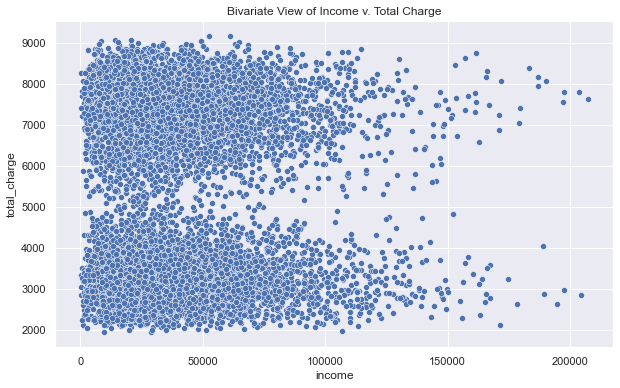

In [16]:
plt.figure(figsize=(10,6))
plt.title('Bivariate View of Income v. Total Charge')
sns.scatterplot(data=df, x='income', y='total_charge')
plt.show()

In [17]:
# get bivariate statistics for income versus total charge
df[['income', 'total_charge']].corr()

,income,total_charge
income,1.000000,-0.014345
total_charge,-0.014345,1.000000


As previously guessed, my initial assumption was that there would be no discernible pattern between total charges and income. Upon examination, the distribution of total charges mirrors its' univariate graph, while income maintains consistency with its' distribution. Additionally, a quick correlation function reveals a correlation coefficient of -0.014 which is considered insignificant.

### Two categorical

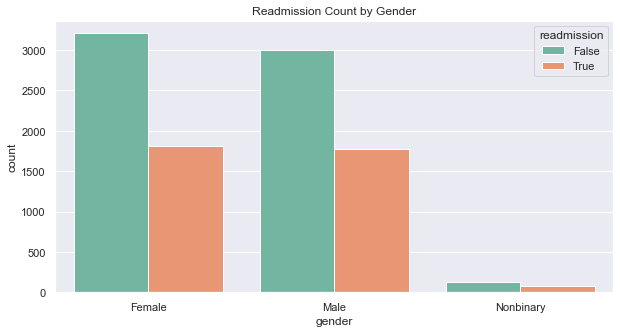

In [18]:
plt.figure(figsize=(10, 5))
plt.title('Readmission Count by Gender')
sns.countplot(data=df, hue='readmission', x='gender', palette="Set2")
plt.show()

In [19]:
pd.crosstab(df.readmission, df.gender)

gender,Female,Male,Nonbinary
readmission,,,
False,3205,2995,131
True,1813,1773,83


The cross tab above shows variations in readmission rates among different gender groups. Females have the highest number of both non-readmitted and readmitted cases, followed closely by males while nonbinary individuals have the lowest representation in both categories, indicating potential disparities in readmission rates across gender groups. However, another possibility is comparing this against the distribution to the local population and finding a similar representation setting.

# E1. Discuss Hypothesis Test Results.

In conducting the $chi^2$ test for independence between gender and readmission, the analysis yielded a p-value greater than the chosen significance level of 0.05. As a result, we failed to reject the null hypothesis indicating that there is insufficient evidence to conclude that gender and readmission are not independent of each other.


However, it's essential to note that failing to reject the null hypothesis does not definitively prove that there is no relationship between gender and readmission rather, it indicates that we do not have enough evidence to support such a conclusion based on the current data set and significance level. Further investigation and analysis may be warranted to explore other potential factors influencing readmission rates.

# E2. Discuss the limitations of your data analysis.

There can be limitations to a $chi^2$ test such as its sensitivity to samples size. According to investopedia.com, "relationships may appear significant when they aren't simple because a very large sample is used" (Hayes, Jan 2024, Investopedia). Another obvious limitation is the fact that this specific test can only be use for categorical variables. Lastly, this hypothesis test does not provided any information on the strength of the possible association.

Nonetheless, this statistical test proved to be a strong step in the right direction in pin pointing which variables readmission may be dependent on.

# E3. Recommend a course of action based on your results.

The rejection of the null hypothesis for gender and readmission indicates that there are differences in the two features. This should lead to further investigation into potential disparities in healthcare access, quality of care, or health outcomes based on gender.

Given the observed relationship between gender and readmission, my recommendation is to conduct a thorough analysis to understand any underlying factors contributing to these disparities. By identifying key determinants, such as differences in healthcare access, quality of care, or patient demographics, stakeholders can develop targeted interventions tailored to the specific needs of different gender groups. These initiatives may include strategies to improve access to care, improve healthcare delivery, and provide personalized support services. 

Implementing robust quality improvement initiatives and continuously monitoring progress is essential to lowering gender based disparities in readmissions and promote equal healthcare outcomes for all patients, regardless of gender. Supporting commitment to equity and inclusion within healthcare systems insures that interventions are designed to address the unique needs and experiences of diverse patients ultimately contributing to a more accessible healthcare system.

# Code Resources:

- References for visuals:
    - [Countplot Visuals](https://seaborn.pydata.org/generated/seaborn.countplot.html)
    
# Source References

- Researching $Chi^$
    - [Investopedia - Chi-Square-Statistic](https://www.investopedia.com/terms/c/chi-square-statistic.asp#:~:text=Chi%2Dsquare%20is%20a%20statistical,between%20expected%20and%20observed%20results.)
    - [Identifying Relationships with Scatterplots](https://www.texasgateway.org/resource/interpreting-scatterplots#:~:text=The%20closer%20the%20data%20points,to%20have%20a%20positive%20correlation.)